MALA HASANATUL AMANAH & SITA SRI ANDARI

In [4]:
#import library dan modul
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
# Step a: Load the input image from Google Drive
input_image1 = cv2.imread('AB1795K.PNG')

In [8]:
# Step b: Convert the input image to grayscale
grayscale_image = cv2.cvtColor(input_image1, cv2.COLOR_BGR2GRAY)


In [9]:
# Step c: Enhance contrast with different coefficients
coefficients = [5, 7.5, 10, 15, 20]
enhanced_images = []
for coef in coefficients:
    enhanced_image = cv2.convertScaleAbs(grayscale_image, alpha=coef, beta=0)
    enhanced_images.append(enhanced_image)

In [10]:
# Step d: Edge detection using Canny method
edge_detected_images = []
for enhanced_image in enhanced_images:
    edges = cv2.Canny(enhanced_image, 100, 200)
    edge_detected_images.append(edges)


In [11]:
# Step e: Calculate Mean Square Error (MSE) for Canny edge detection
def mse(image1, image2):
    err = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
    err /= float(image1.shape[0] * image1.shape[1])
    return err

original_edges = cv2.Canny(grayscale_image, 100, 200)
mse_values = []
for edge_image in edge_detected_images:
    mse_value = mse(original_edges, edge_image)
    mse_values.append(mse_value)


In [12]:
# Print MSE values for each enhanced image
for i, mse_value in enumerate(mse_values):
    print(f"MSE for enhanced image with coefficient {coefficients[i]}: {mse_value}")

MSE for enhanced image with coefficient 5: 7088.568440056128
MSE for enhanced image with coefficient 7.5: 8262.207489133783
MSE for enhanced image with coefficient 10: 7048.788780416852
MSE for enhanced image with coefficient 15: 4593.020701427154
MSE for enhanced image with coefficient 20: 3659.450507375338


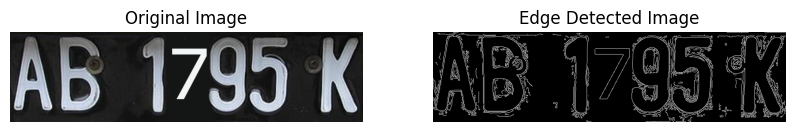

In [13]:
# Display original and edge-detected images side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edge_detected_images[0], cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.show()